In [1]:
from netCDF4 import Dataset

dataset= Dataset('fich.nc', 'w', format='NETCDF4_CLASSIC')
print(dataset.data_model)

NETCDF4_CLASSIC


In [2]:
lat = dataset.createDimension('lat', 73)
lon = dataset.createDimension('lon', 144)
time = dataset.createDimension('time', None)

In [3]:
for dimname in dataset.dimensions.keys():
    dim = dataset.dimensions[dimname]
    print(dimname, len(dim), dim.isunlimited())

lat 73 False
lon 144 False
time 0 True


In [4]:
import numpy as np

times = dataset.createVariable('time', np.float64, ('time',))
latitudes = dataset.createVariable('latitude', np.float32,('lat',))
longitudes = dataset.createVariable('longitude', np.float32,('lon',)) 
temp = dataset.createVariable('temp', np.float32, ('time','lat','lon')) 


In [5]:
latitudes.units = 'degree_north'
longitudes.units = 'degree_north'
temp.units = 'K'
times.units= 'hours since 00:00:00'
times.calendar = 'gregorian'

In [6]:
lats = np.arange(-90,91,2.5)
lons = np.arange(-180,180,2.5)
latitudes[:] = lats
longitudes[:] = lons

In [7]:
print(temp.shape)

(0, 73, 144)


In [8]:
numeros = range(0,3)
numeros= list(numeros)
np.random.shuffle(numeros)
times = numeros
print(times[:])
print("len", len(times))


[9, 1, 5, 7, 3, 4, 6, 0, 2, 8]
len 10


In [9]:
from numpy.random import uniform
nlats= len(dataset.dimensions['lat'])
nlons = len(dataset.dimensions['lon'])
temp[0:10,:,:] = uniform (size=(10,nlats,nlons))
print("before adding data", temp.shape)

before adding data (10, 73, 144)


In [10]:
print("len", len(times))

len 10


#Una vez asignados los valores los ordeno segun el tiempo, de mayor a menor.

In [11]:
lista_ordenada=np.sort(times)
lista_ordenada= lista_ordenada[::-1]

print(lista_ordenada)

orden= np.array([times.index(max(times))])
for n in lista_ordenada[1:]:
    orden=np.append(orden,times.index(n))
    print("añado ",n, "en la posicion", times.index(n))
    
print(orden)
print(times[:])


[9 8 7 6 5 4 3 2 1 0]
añado  8 en la posicion 9
añado  7 en la posicion 3
añado  6 en la posicion 6
añado  5 en la posicion 2
añado  4 en la posicion 5
añado  3 en la posicion 4
añado  2 en la posicion 8
añado  1 en la posicion 1
añado  0 en la posicion 7
[0 9 3 6 2 5 4 8 1 7]
[9, 1, 5, 7, 3, 4, 6, 0, 2, 8]


In [12]:
aux= temp[:,:,:]
for n in range(len(times)):
    print(n,temp[n,0,0],aux[n,0,0])

0 0.5961311 0.5961311
1 0.41549325 0.41549325
2 0.4076313 0.4076313
3 0.35785836 0.35785836
4 0.9896793 0.9896793
5 0.65307283 0.65307283
6 0.73238796 0.73238796
7 0.12206938 0.12206938
8 0.35814214 0.35814214
9 0.53480405 0.53480405


In [13]:


for n in range(len(times)):
    temp[n,:,:] = aux[orden[n],:,:]
    


In [14]:
for n in range(len(times)):
    print(n,temp[n,0,0],aux[n,0,0])

0 0.5961311 0.5961311
1 0.53480405 0.41549325
2 0.35785836 0.4076313
3 0.73238796 0.35785836
4 0.4076313 0.9896793
5 0.65307283 0.65307283
6 0.9896793 0.73238796
7 0.35814214 0.12206938
8 0.41549325 0.35814214
9 0.12206938 0.53480405


In [24]:
dataset.variables["temp"][0,:,:].shape

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  units: hours since 00:00:00
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (10,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(lat)
                  units: degree_north
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(lon)
                  units: degree_north
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('temp', <class 'netCDF4._netCDF4.Variable'>
              float32 temp(time, lat, 

In [22]:
import matplotlib.pyplot as plt

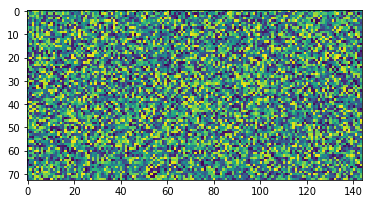

In [23]:
plt.imshow(dataset.variables["temp"][0,:,:])